# Bank Series

We will propose a relevant and exhaustive market risk analysis of a Bank. The bank is **JP Morgan**

## Import Libraries

In [58]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [15, 8]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Donwload the data

In [59]:
ticker = 'JPM'
prices = sf.get_data(ticker)

We compute the returns

In [60]:
returns = sf.get_returns(prices)

We plot the returns for the bank

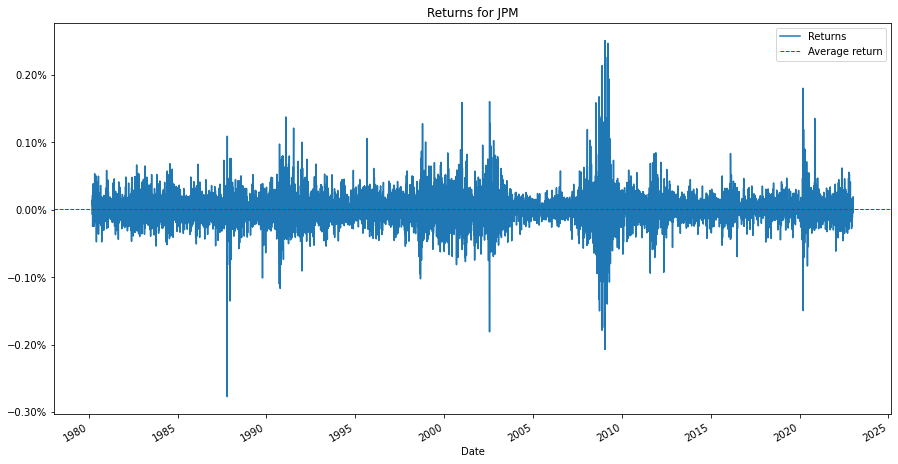

In [61]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

### Non parametric method

In [62]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95)

VaR au niveau de confiance 95% : 0.0338


### Parametric method

In [63]:
VaR_Param = sf.garch_var(returns=returns, confidence_level=95)

/Users/simonevanno/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005069. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/simonevanno/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005069. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/simonevanno/opt/anaconda3/lib/pyt

In [64]:
VaR_Param

Date
1980-03-18 00:00:00-05:00    0.030794
1980-03-19 00:00:00-05:00    0.029633
1980-03-20 00:00:00-05:00    0.029280
1980-03-21 00:00:00-05:00    0.028371
1980-03-24 00:00:00-05:00    0.029362
                               ...   
2023-01-03 00:00:00-05:00    0.021563
2023-01-04 00:00:00-05:00    0.021291
2023-01-05 00:00:00-05:00    0.021223
2023-01-06 00:00:00-05:00    0.020691
2023-01-09 00:00:00-05:00    0.022419
Name: cond_vol, Length: 10795, dtype: float64